# Load Data

In [4]:
# images are in ./dataset/khalil and ./dataset/others
# labels are the folder names
# load the data

import os
import numpy as np

data_path = './dataset'
folders = os.listdir(data_path)
labels = []
images = []

# each image has a label. labels are the folder names.
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image)
        images.append(image_path)
        labels.append(folder)

# convert to numpy arrays
images = np.array(images)
labels = np.array(labels)
print(images)
print(labels)


['./dataset\\khalil\\image00007.jpeg' './dataset\\khalil\\image00008.jpeg'
 './dataset\\khalil\\image00020.jpeg' './dataset\\khalil\\image00021.jpeg'
 './dataset\\khalil\\image00022.jpeg' './dataset\\khalil\\image00033.jpeg'
 './dataset\\khalil\\image00038.jpeg'
 './dataset\\khalil\\photo_2022-11-06_14-49-18.jpg'
 './dataset\\khalil\\photo_2022-11-06_14-50-06.jpg'
 './dataset\\others\\106.jpg' './dataset\\others\\29.jpg'
 './dataset\\others\\332.jpg' './dataset\\others\\409.jpg'
 './dataset\\others\\43.jpg' './dataset\\others\\80.jpg'
 './dataset\\others\\90.jpg']
['khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil' 'khalil'
 'khalil' 'others' 'others' 'others' 'others' 'others' 'others' 'others']


# Image Preprocessing

## HaaR Cascade Face Detection

In [6]:
# detect faces in the image and extract the face

import cv2
haar_file = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

def face_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return None
    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
    return cropped_face



<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\MSI\AppData\Local\Temp\ipykernel_20984\3664264089.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [7]:
# function to extract faces from an image
def faces_extractor(img):
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces is ():
        return None
    faces_list = []
    for (x, y, w, h) in faces:
        cropped_face = img[y:y+h, x:x+w]
        faces_list.append(cropped_face)
    return faces_list


<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\MSI\AppData\Local\Temp\ipykernel_20984\4126523297.py:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [4]:
# test faces_extractor on "./dataset/many.jpeg"
# img = cv2.imread('./dataset/many.jpeg')
# faces = faces_extractor(img)
# for face in faces:
#     cv2.imshow('face', face)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# extract faces from the images and display them
for image in images:
    img = cv2.imread(image)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    face = face_extractor(img)
    if face is not None:
        face = cv2.resize(face, (200, 200))
        imgplot = plt.imshow(face)
        plt.show()


In [7]:
# extract faces from the images using faces_extractor and display them
# for image in images:
#     img = cv2.imread(image)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     faces = faces_extractor(img)
#     for face in faces:
#         if face is not None:
#             face = cv2.resize(face, (200, 200))
#             imgplot = plt.imshow(face)
#             plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for image in images:
    img = mpimg.imread(image)

    face = face_extractor(img)
    if face is not None:
        plt.imshow(face)
        plt.show()
    else:
        print('Face not found')

In [10]:
# save the faces in "processed" folder. The folder will be created if it doesn't exist.
# the faces are saved with the name of the folder they belong to (label) and a number.
processed_path = './processed'
if not os.path.exists(processed_path):
    os.mkdir(processed_path)
#clean the folder
for folder in os.listdir(processed_path):
    folder_path = os.path.join(processed_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        os.remove(file_path)
    os.rmdir(folder_path)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i, image in enumerate(images):
    img = cv2.imread(image)
    face = face_extractor(img)
    if face is not None:
        face = cv2.resize(face, (200, 200))
    
        save_path = os.path.join(processed_path, labels[i])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        file_name_path = os.path.join(save_path, labels[i] + str(i) + '.jpg')
        cv2.imwrite(file_name_path, face)
        cv2.waitKey(0)
    else:
        print('Face not found')
        pass



In [10]:
processed= './processed/khalil/'
processed



'./processed/khalil/'

In [11]:
# #using faces_extractor
# processed_path = './processed'
# if not os.path.exists(processed_path):
#     os.mkdir(processed_path)
# #clean the folder
# for folder in os.listdir(processed_path):
#     folder_path = os.path.join(processed_path, folder)
#     for file in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file)
#         os.remove(file_path)
#     os.rmdir(folder_path)

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# for i, image in enumerate(images):
#     img = cv2.imread(image)
#     faces = faces_extractor(img)
#     for j, face in enumerate(faces):
#         if face is not None:
#             face = cv2.resize(face, (200, 200))
#             face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
#             save_path = os.path.join(processed_path, labels[i])
#             if not os.path.exists(save_path):
#                 os.mkdir(save_path)
#             file_name_path = os.path.join(save_path, labels[i] + str(i) + '_' + str(j) + '.jpg')
#             cv2.imwrite(file_name_path, face)
#             cv2.waitKey(0)
#         else:
#             print('Face not found')
#             pass

# Face Recognition

## CNN Model

### Training

### Testing

### Evaluation

# Deployment

In [2]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''

# Specifying the folder where images are present
TrainingImagePath='./processed'

from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# Printing class labels for each face
test_set.class_indices

Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


{'khalil': 0, 'others': 1}

In [3]:
training_set.values

AttributeError: 'DirectoryIterator' object has no attribute 'values'

Found 16 images belonging to 2 classes.
(16, 256, 256, 3) [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


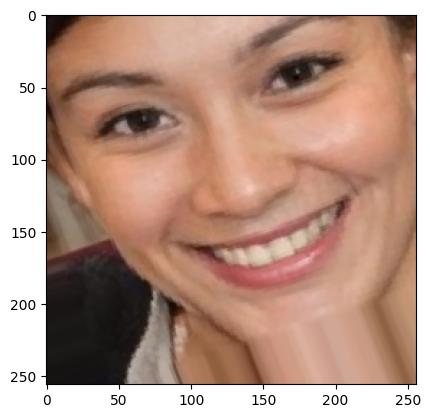

(16, 256, 256, 3) [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


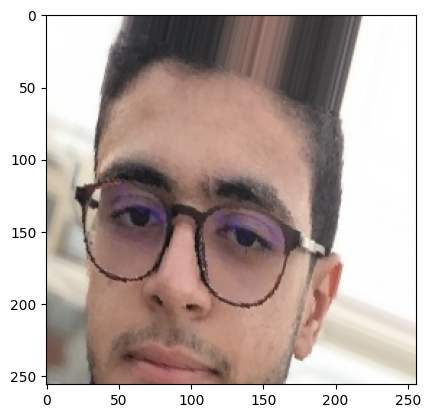

(16, 256, 256, 3) [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


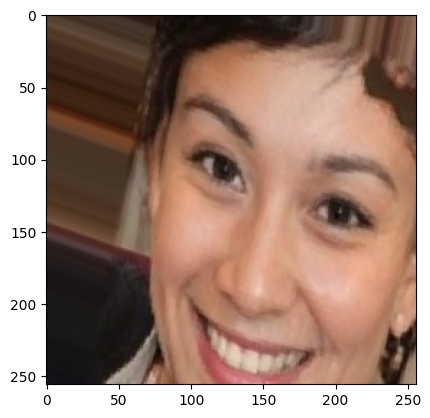

(16, 256, 256, 3) [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


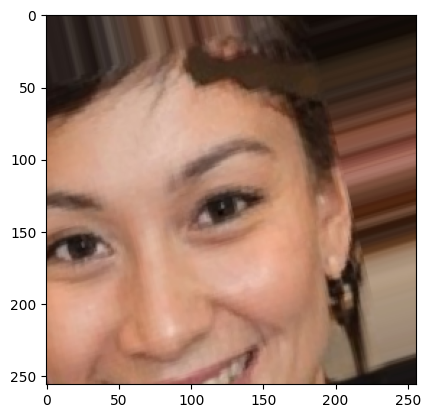

(16, 256, 256, 3) [[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


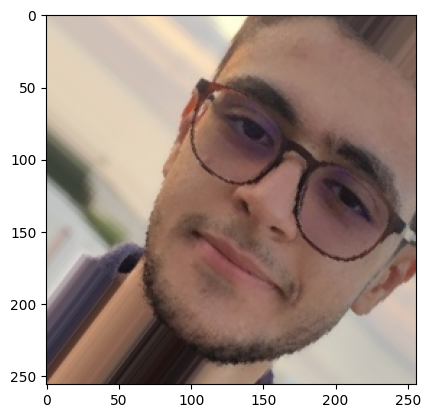

(16, 256, 256, 3) [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


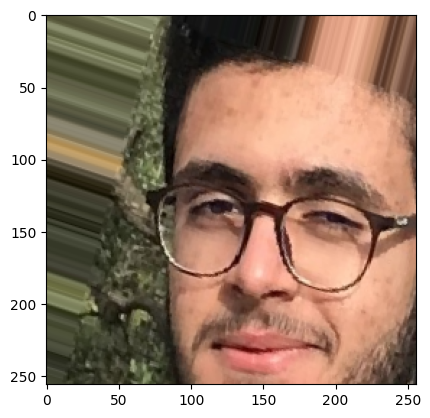

(16, 256, 256, 3) [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


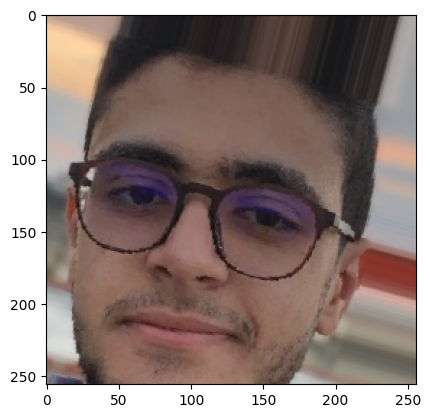

(16, 256, 256, 3) [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


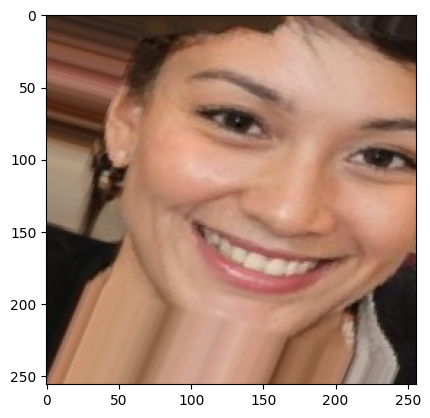

(16, 256, 256, 3) [[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


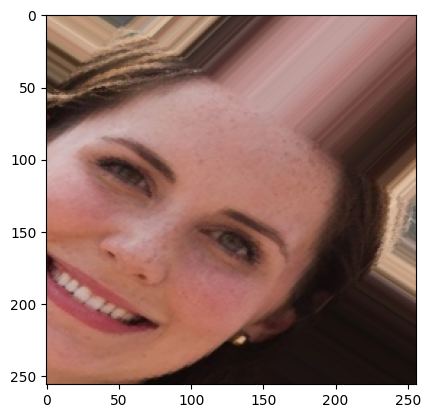

(16, 256, 256, 3) [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


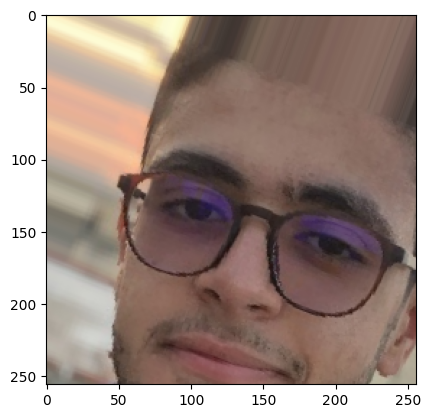

In [4]:
# clear the output folder before running the model
# folder_path = './output'
# for file in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, file)
#     os.remove(file_path)
# os.rmdir(folder_path)


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
dir_Iterator = datagen.flow_from_directory(
    TrainingImagePath,
    batch_size=32,
    save_to_dir="output/",
    save_format="jpg",
    target_size=(256, 256),
)
import matplotlib.pyplot as plt
for i in range(10):
    img, label = dir_Iterator.next()
    print(img.shape, label)
    plt.imshow(img[0])
    plt.show()

training_set=dir_Iterator

In [50]:
# generate training data
from keras import preprocessing 
training_images = image_dataset_from_directory(
    TrainingImagePath,
    labels='inferred',
    class_names=['khalil', 'other'],
    color_mode='rgb',
    batch_size=1,
)

#display the images
for x, y in training_images.take(1):
    plt.imshow(x[0])
    plt.show()  
    
    

NameError: name 'image_dataset_from_directory' is not defined

In [2]:
from tf.keras.preprocessing.image import ImageDataGenerator
TrainingImagePath='./processed'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
dir_Iterator = datagen.flow_from_directory(
    TrainingImagePath,
    batch_size=32,
    save_to_dir="output/",
    save_format="jpg",
    target_size=(256, 256),
)
for i in range(10):
    img, label = dir_Iterator.next()
    print(img.shape, label)
    plt.imshow(img[0])
    plt.show()

training_set=dir_Iterator

ModuleNotFoundError: No module named 'tf'

Creating a mapping for index and face names


In [67]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Print the ResultMap
print(ResultMap)

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'khalil', 1: 'others'}

 The Number of output neurons:  2


Creating the CNN face recognition model

In [83]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
 
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()
 
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(256,256,3), activation='relu'))
 
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''# STEP--3 FLattening'''
classifier.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
 
classifier.add(Dense(OutputNeurons, activation='softmax'))
 
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
 
###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Starting the model training
classifier.fit_generator(
                    training_set,
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)
 
EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')


C:\Users\MALEK\AppData\Local\Temp\ipykernel_13384\2540500369.py:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
 1/30 [>.............................] - ETA: 1:05 - loss: 0.6749 - accuracy: 0.6250WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 300 batches). You may need to use the repeat() function when building your dataset.


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/flatten_4/Reshape' defined at (most recent call last):
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\MALEK\AppData\Local\Temp\ipykernel_13384\2540500369.py", line 43, in <cell line: 43>
      classifier.fit_generator(
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1606, in fit
      val_logs = self.evaluate(
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\MALEK\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_4/flatten_4/Reshape'
Input to reshape is a tensor with 173056 values, but the requested shape requires a multiple of 238144
	 [[{{node sequential_4/flatten_4/Reshape}}]] [Op:__inference_test_function_5914]

In [80]:
ImagePath='/khalil0.jpg'
im=cv2.imread(ImagePath)


In [81]:
import numpy as np
import keras.utils as image
 
ImagePath='others9.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  khalil
